In [2]:
import igraph as ig
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/rachelroca/Documents/Documents/GitHub/DAAAAMNdjmm/data cleaning/Final Coding.csv",keep_default_na=False)
#The codes were in 5 different columns; lets aggregate them into a new column
df["all codes"] = df[["SO code","BC code","BtC code","CCM code","SJEDI code"]].agg(';'.join,axis=1)
#We separated them by ;, so convert to an array 
df["all codes"] = df["all codes"].apply(lambda s: s.split(';'))
#Strip out leading/trailing spaces
df["all codes"] = df["all codes"].apply(lambda s: [t.strip() for t in s if t])
#Sort the arrays, so we can be confident the same things are not listed in two different ways
df["all codes"] = np.array(df["all codes"].apply(sorted))

In [4]:
tweeters = df['user_username'].unique()
codes = ['advocacy', 'amplification', 'emotional support', 'gender', 'indigenous', 'jmm experience', 'representation', 'bipoc', 'hashtags', 'influencers', 'power', 'talk support', 'humanize', 'math practice', 'current events', 'lgbtq', 'strategic planning', 'allyship in math', 'math experience', 'conversation', 'thankful', 'BC impact', 'disrupteverything', 'SJEDI impact', 'SO impact', 'belonging', 'learning', 'troll', 'CC impact', 'virtual participation', 'activation', 'futures', 'economic', 'beyond', 'celebration']


In [5]:
df_codes = pd.DataFrame(columns = codes)
num_tweets_retweets = np.zeros(len(tweeters))
for i in range(len(tweeters)):
    df_temp = df[df['user_username'] == tweeters[i]]
    num_tweets_retweets[i] = len(df_temp)
    #sum the all codes column
    codes_sum_temp = df_temp['all codes'].sum()
    #make a dictionary of the codes and how many times they appear in codes_sum_temp
    codes_dict_temp = {i:codes_sum_temp.count(i) for i in codes}
    #make the dictionary a dataframe
    codes_dict_temp_df = pd.DataFrame.from_dict([codes_dict_temp])
    #add the dictionary to the dataframe
    df_codes = pd.concat([df_codes,codes_dict_temp_df], ignore_index=True)
#make the indices the tweeters' names
df_codes.index = tweeters

In [6]:
#make the dataframe into a numpy array
df_codes_array = df_codes.to_numpy()
df_codes_array=df_codes_array.astype('i')

In [7]:
SO_codes = ['amplification', 'SO impact', 'activation', 'strategic planning', 'troll']
BC_codes = ['thankful', 'talk support', 'belonging', 'emotional support', 'conversation', 'celebration', 'BC impact']
BCP_codes = ['disrupteverything', 'influencers', 'hashtags', 'virtual participation']
CC_codes = ['humanize', 'jmm experience', 'math experience', 'futures', 'math practice', 'current events', 'allyship in math', 'CC impact']
SJEDI_codes = ['representation', 'lgbtq', 'bipoc', 'gender',  'indigenous', 'power', 'advocacy', 'learning', 'economic', 'SJEDI impact']

Text(0, 0.5, 'Number of tweets/retweets')

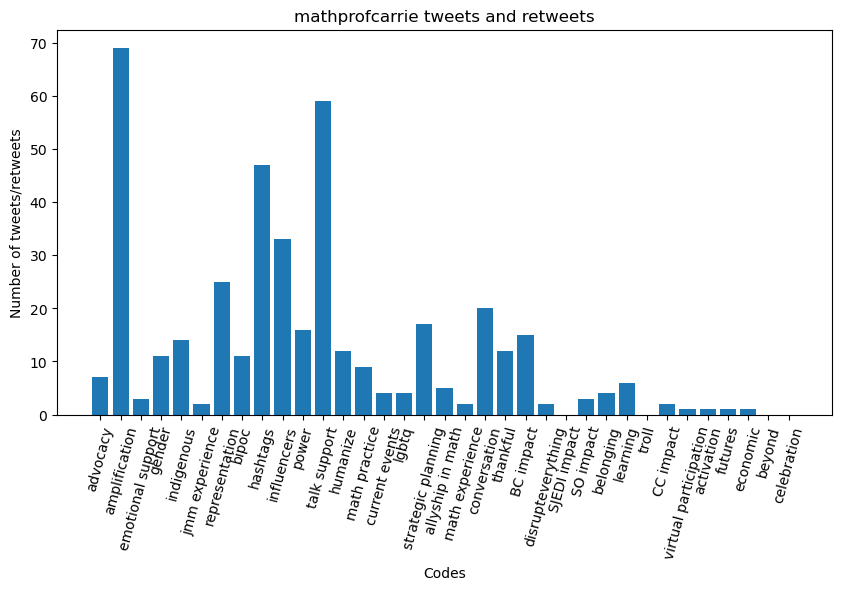

In [8]:
plt.figure(figsize=(10,5))
plt.bar(codes, df_codes.loc['mathprofcarrie'])
plt.xticks(rotation=75, fontsize=10)
plt.title('mathprofcarrie tweets and retweets')
plt.xlabel('Codes')
plt.ylabel('Number of tweets/retweets')

In [9]:
#sum up all the columns in SO_codes, BC_codes, BCP_codes, CC_codes, and SJEDI_codes for each tweeter
df_codes['SO_codes'] = df_codes[SO_codes].sum(axis=1)
df_codes['BC_codes'] = df_codes[BC_codes].sum(axis=1)
df_codes['BCP_codes'] = df_codes[BCP_codes].sum(axis=1)
df_codes['CC_codes'] = df_codes[CC_codes].sum(axis=1)
df_codes['SJEDI_codes'] = df_codes[SJEDI_codes].sum(axis=1)

df_codes

,advocacy,amplification,emotional support,gender,indigenous,jmm experience,representation,bipoc,hashtags,influencers,...,activation,futures,economic,beyond,celebration,SO_codes,BC_codes,BCP_codes,CC_codes,SJEDI_codes
mathyadriana,1,6,1,2,1,2,5,2,3,2,...,0,0,0,0,0,8,9,5,5,14
mathprofcarrie,7,69,3,11,14,2,25,11,47,33,...,1,1,1,0,0,90,113,83,37,95
pwr2dppl,8,51,7,8,12,6,20,12,39,28,...,1,0,0,0,0,73,84,67,40,84
xl772,2,6,1,1,2,1,6,0,3,4,...,0,0,0,0,0,10,8,7,3,13
WanderingPoint,1,11,3,1,4,2,6,1,8,5,...,0,0,0,0,0,14,18,13,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superyarn,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,4
dbdoughe,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,4
cordesm,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,4
f_futamura,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,4


In [10]:
#'disrupteverything', 'influencers', 'hashtags', 'virtual participation'

df_codes.loc['mathprofcarrie', 'disrupteverything'] + df_codes.loc['mathprofcarrie', 'influencers'] + df_codes.loc['mathprofcarrie', 'hashtags'] + df_codes.loc['mathprofcarrie', 'virtual participation']



83

In [11]:
#make a small data frame of small numbers to test a thing
df_small = pd.DataFrame({'a':[1,2,3,4,5], 'b':[2,3,4,5,6], 'c':[3,4,5,6,7]})
df_small
#sum the columns a and c

df_small['ac'] = df_small[['a', 'c']].sum(axis=1)
df_small


,a,b,c,ac
0,1,2,3,4
1,2,3,4,6
2,3,4,5,8
3,4,5,6,10
4,5,6,7,12


## Clusters from Mapper (interval = 1)

In [12]:
#getting the filter function
def l1_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=1, axis=1).reshape(-1, 1)

def linf_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=np.inf, axis=1).reshape(-1, 1)

from sklearn.preprocessing import FunctionTransformer
l1_norm_trans = FunctionTransformer(l1_norm)

linf_norm_trans = FunctionTransformer(linf_norm)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [13]:
import gtda.mapper as map
import sklearn.cluster as cluster


filter_func = l1_norm_trans
cover = map.OneDimensionalCover(kind='uniform', n_intervals=1, overlap_frac=0.35)
clusterer = cluster.DBSCAN()

pipe = map.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=1,
)

fig = map.plot_static_mapper_graph(pipe, df_codes_array)
fig.show(config={'scrollZoom': True})


In [14]:
graph = pipe.fit_transform(df_codes_array)
graph.vs.attributes()
node_elts = graph.vs["node_elements"]
node_elts

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 103, 106, 108, 109, 111,
        113, 114, 117, 122, 125, 128, 131, 132, 134, 135, 136, 138, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168,
        169, 170, 175, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 190, 193, 202, 203, 204, 206, 211, 214, 216, 217, 220, 223,
        224, 237, 238, 239, 240, 241, 242, 243, 244

In [64]:
#looking at the different clusters

#get these rows from df_codes
cluster0 = node_elts[0]

#add normal index
df_codes_clusters = df_codes.reset_index(drop=False)
df_cluster0 = df_codes_clusters.iloc[cluster0]
cluster0_code_sum = df_cluster0.iloc[:,1:-5].sum()
cluster0_code_sum


advocacy                 119
amplification            538
emotional support         72
gender                   148
indigenous               150
jmm experience            70
representation           220
bipoc                    111
hashtags                 386
influencers              310
power                    153
talk support             495
humanize                 133
math practice            118
current events            59
lgbtq                     46
strategic planning        99
allyship in math          45
math experience           15
conversation              56
thankful                  84
BC impact                112
disrupteverything         12
SJEDI impact              10
SO impact                 38
belonging                 32
learning                  32
troll                      5
CC impact                 10
virtual participation      9
activation                 7
futures                    9
economic                   3
beyond                     1
celebration   

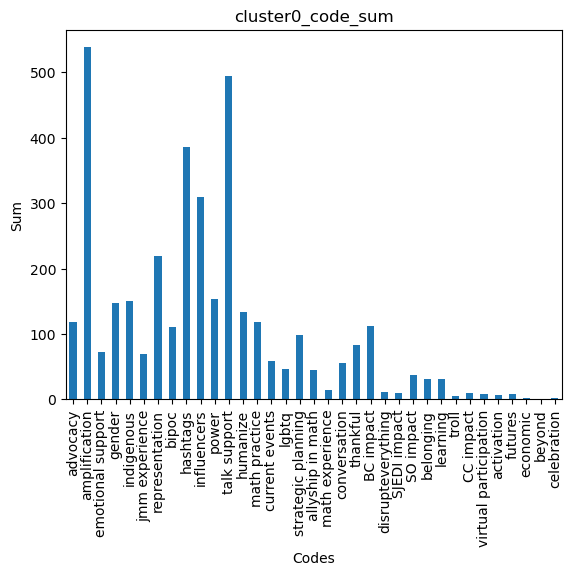

In [65]:
#plotting codes for cluster 0
cluster0_code_sum.plot(kind='bar')
plt.xlabel('Codes')
plt.ylabel('Sum')
plt.title('cluster0_code_sum')
plt.show()

Text(0.5, 1.0, 'cluster0_themes')

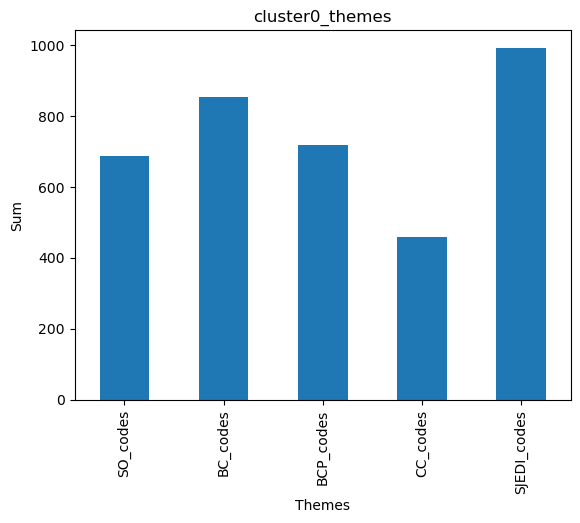

In [66]:
#plotting themes for cluster 0
cluster1_themes = df_cluster0.iloc[:,-5:].sum()
cluster1_themes.plot(kind='bar')
plt.xlabel('Themes')
plt.ylabel('Sum')
plt.title('cluster0_themes')

In [67]:
df[df['user_username'].isin(df_cluster0['index'].values)]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
0,1,1217856519670288384,mathyadriana,Anyone feel like looking through the list of i...,2020-01-16T17:09:55.000Z,1217856519670288384,en,False,776450766710136832,Twitter for iPhone,...,1,talk support,0,,0,,1,bipoc; lgbtq; gender,DL,"[bipoc, gender, lgbtq, talk support]"
1,5,1217856052579971073,mathprofcarrie,"""If you think that your right to speech is mor...",2020-01-16T17:08:04.000Z,1217856052579971073,en,False,31611970,Twitter for Android,...,1,talk support,1,influencers,0,,1,representation,RR,"[amplification, influencers, representation, t..."
2,8,1217855474479046656,pwr2dppl,I ran at elevation to make it to @xl772's #Dis...,2020-01-16T17:05:46.000Z,1217855474479046656,en,False,3308531970,Twitter for Android,...,1,talk support; thankful,0,,0,,0,,JH,"[amplification, talk support, thankful]"
3,9,1217854597747875840,mathprofcarrie,@WanderingPoint @xl772 @pwr2dppl Here!!! #disr...,2020-01-16T17:02:17.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,talk support; emotional support,0,,0,,0,,DL,"[emotional support, talk support]"
4,10,1217852288385024000,mathprofcarrie,@xl772 @pwr2dppl Where and what? - let's get t...,2020-01-16T16:53:06.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,BC impact; talk support,0,,0,,0,,RR,"[BC impact, talk support]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1124,1218635813027602432,malagonmath,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:46:33.000Z,1218635813027602432,en,False,708028111540133888,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1125,1125,1218635334251999232,noellebeckman,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:44:39.000Z,1218635334251999232,en,False,1660843818,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1126,1127,1218632621162483713,MarissaKawehi,RT @matthematician: “[C]arry some of this weig...,2020-01-18T20:33:52.000Z,1218632621162483713,en,False,969876723922808832,Twitter for Android,...,1,talk support,0,,1,allyship in math,1,gender,,"[allyship in math, amplification, gender, talk..."
1127,1128,1218630899404640256,numberdance,RT @sbagley: Kelly MacArthur now speaking abou...,2020-01-18T20:27:02.000Z,1218630899404640256,en,False,961503306,Twitter Web App,...,1,talk support,1,hashtags; influencers,1,math practice; humanize,0,,,"[amplification, hashtags, humanize, influencer..."


In [68]:
df_cluster0

,index,advocacy,amplification,emotional support,gender,indigenous,jmm experience,representation,bipoc,hashtags,...,activation,futures,economic,beyond,celebration,SO_codes,BC_codes,BCP_codes,CC_codes,SJEDI_codes
0,mathyadriana,1,6,1,2,1,2,5,2,3,...,0,0,0,0,0,8,9,5,5,14
1,mathprofcarrie,7,69,3,11,14,2,25,11,47,...,1,1,1,0,0,90,113,83,37,95
2,pwr2dppl,8,51,7,8,12,6,20,12,39,...,1,0,0,0,0,73,84,67,40,84
3,xl772,2,6,1,1,2,1,6,0,3,...,0,0,0,0,0,10,8,7,3,13
4,WanderingPoint,1,11,3,1,4,2,6,1,8,...,0,0,0,0,0,14,18,13,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,sajinkoroth,2,4,1,2,1,1,1,0,1,...,0,0,0,0,0,4,3,3,3,7
316,JasonWilliamsNY,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
318,ONUMathStat,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
321,cjp_still,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1


Text(0.5, 1.0, 'cluster2_code_sum')

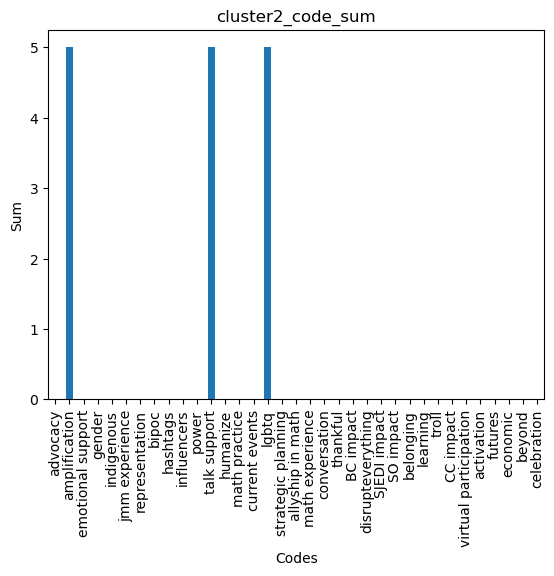

In [23]:
#cluster 1
cluster1 = node_elts[1]
df_cluster1 = df_codes_clusters.iloc[cluster1]
cluster1_code_sum = df_cluster1.iloc[:,1:-5].sum()
cluster1_code_sum.plot(kind='bar')
plt.xlabel('Codes')
plt.ylabel('Sum')
plt.title('cluster1_code_sum')

Text(0, 0.5, 'Sum')

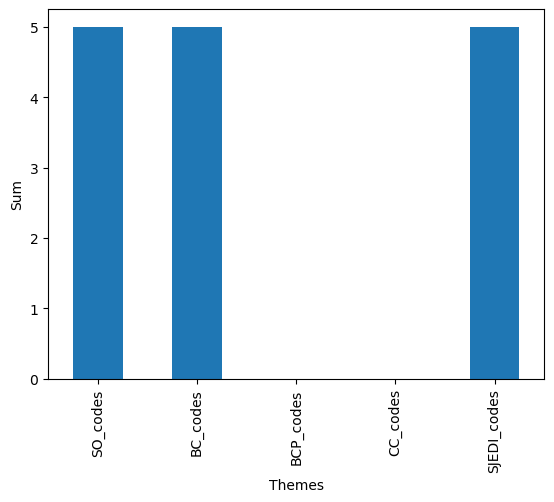

In [35]:
#themes for cluster 2
cluster1_themes = df_cluster1.iloc[:,-5:].sum()
cluster1_themes.plot(kind='bar')
plt.xlabel('Themes')
plt.ylabel('Sum')

In [24]:
df_cluster1

,index,advocacy,amplification,emotional support,gender,indigenous,jmm experience,representation,bipoc,hashtags,...,activation,futures,economic,beyond,celebration,SO_codes,BC_codes,BCP_codes,CC_codes,SJEDI_codes
81,MiraWaddle,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
174,anitochdz,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
176,evelynjlamb,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
179,AlexPHoover,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
258,dana_neidinger,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [29]:
#get tweets from MiraWaddle
mw_tweets = df[df['user_username'] == 'MiraWaddle']
mw_tweets

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
310,20,1217829966345207808,MiraWaddle,"RT @frontLahn: If you're at #JMM2020, come to ...",2020-01-16T15:24:24.000Z,1217829966345207808,en,False,2259264519,Twitter for iPhone,...,1,talk support,0,,0,,1,lgbtq,,"[amplification, lgbtq, talk support]"


In [48]:
df[df['user_username'].isin(df_cluster1['index'].values)]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
310,20,1217829966345207808,MiraWaddle,"RT @frontLahn: If you're at #JMM2020, come to ...",2020-01-16T15:24:24.000Z,1217829966345207808,en,False,2259264519,Twitter for iPhone,...,1,talk support,0,,0,,1,lgbtq,,"[amplification, lgbtq, talk support]"
725,608,1217894591137046528,anitochdz,"RT @frontLahn: If you're at #JMM2020, come to ...",2020-01-16T19:41:12.000Z,1217894591137046528,en,False,313610330,Twitter for iPad,...,1,talk support,0,,0,,1,lgbtq,,"[amplification, lgbtq, talk support]"
729,613,1217887806833299456,evelynjlamb,"RT @frontLahn: If you're at #JMM2020, come to ...",2020-01-16T19:14:15.000Z,1217887806833299456,en,False,603367602,Twitter for iPhone,...,1,talk support,0,,0,,1,lgbtq,,"[amplification, lgbtq, talk support]"
737,624,1217871658691764224,AlexPHoover,"RT @frontLahn: If you're at #JMM2020, come to ...",2020-01-16T18:10:05.000Z,1217871658691764224,en,False,2159466858,Twitter for Android,...,1,talk support,0,,0,,1,lgbtq,,"[amplification, lgbtq, talk support]"
943,911,1220080420534005762,dana_neidinger,RT @mathprofcarrie: Panel answer about transge...,2020-01-22T20:26:54.000Z,1220080420534005762,en,False,989340964660662273,Twitter Web App,...,1,talk support,0,,0,,1,lgbtq,,"[amplification, lgbtq, talk support]"


Text(0.5, 1.0, 'cluster3_code_sum')

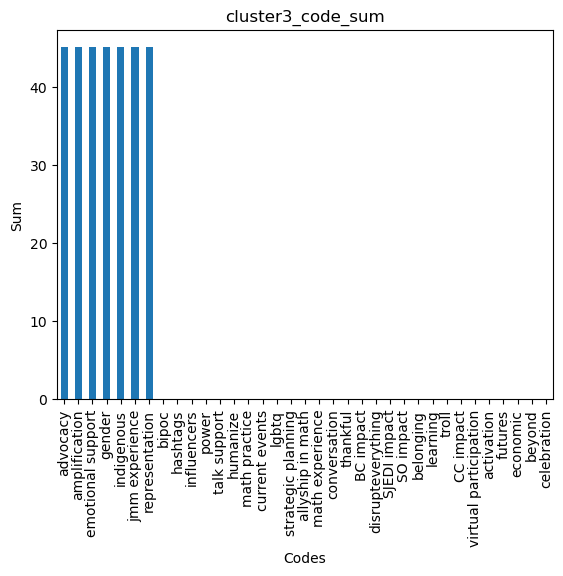

In [34]:
#cluster 2
cluster2 = node_elts[2]
df_cluster2 = df_codes_clusters.iloc[cluster2]
cluster2_code_sum = df_cluster2.iloc[:,1:-5].sum()
cluster2_code_sum.plot(kind='bar')
plt.xlabel('Codes')
plt.ylabel('Sum')
plt.title('cluster2_code_sum')

Text(0, 0.5, 'Sum')

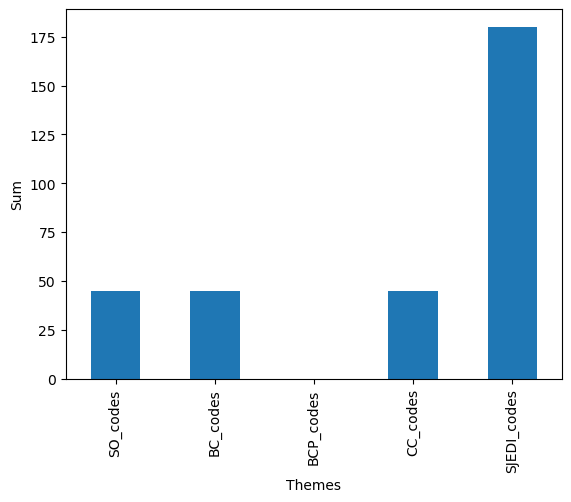

In [49]:
#themes for cluster 2
cluster2_themes = df_cluster2.iloc[:,-5:].sum()
cluster2_themes.plot(kind='bar')
plt.xlabel('Themes')
plt.ylabel('Sum')


In [36]:
df_cluster2

,index,advocacy,amplification,emotional support,gender,indigenous,jmm experience,representation,bipoc,hashtags,...,activation,futures,economic,beyond,celebration,SO_codes,BC_codes,BCP_codes,CC_codes,SJEDI_codes
100,samit_dasgupta,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,1,4
101,QCohBeef,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,1,4
105,jessalynalyn,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,1,4
110,MathmoClaire,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,1,4
112,joshuagrochow,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,1,4
115,arsuaga3,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,1,4
116,mathzorro,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,1,4
118,bat_scholar,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,1,4
119,ilaba,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,1,4
120,AnnClifton9,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,1,4


In [47]:
#show df for index in cluster 2
df[df['user_username'].isin(df_cluster2['index'].values)]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
426,179,1218621821693710336,samit_dasgupta,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T19:50:57.000Z,1218621821693710336,en,False,1150961015384870912,Twitter for iPhone,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."
427,180,1218619635005902848,QCohBeef,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T19:42:16.000Z,1218619635005902848,en,False,1141884639373664257,Twitter Web App,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."
435,189,1218612013791764480,jessalynalyn,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T19:11:59.000Z,1218612013791764480,en,False,838443841,Twitter for Android,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."
445,200,1218607649161236487,MathmoClaire,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T18:54:38.000Z,1218607649161236487,en,False,339530097,Twitter for iPad,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."
453,210,1218601968362409984,joshuagrochow,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T18:32:04.000Z,1218601968362409984,en,False,327798532,Twitter Web App,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."
462,220,1218599284628738048,arsuaga3,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T18:21:24.000Z,1218599284628738048,en,False,3095006714,Twitter Web App,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."
470,229,1218590524401225728,mathzorro,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T17:46:35.000Z,1218590524401225728,en,False,31278948,Twitter Web App,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."
472,231,1218589058298867712,bat_scholar,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T17:40:46.000Z,1218589058298867712,en,False,3285803112,Twitter for Android,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."
478,237,1218585531082166273,ilaba,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T17:26:45.000Z,1218585531082166273,en,False,122780488,Twitter Web App,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."
479,238,1218584993938780160,AnnClifton9,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T17:24:37.000Z,1218584993938780160,en,False,1116359555334721538,Twitter for iPhone,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."


Text(0.5, 1.0, 'cluster4_code_sum')

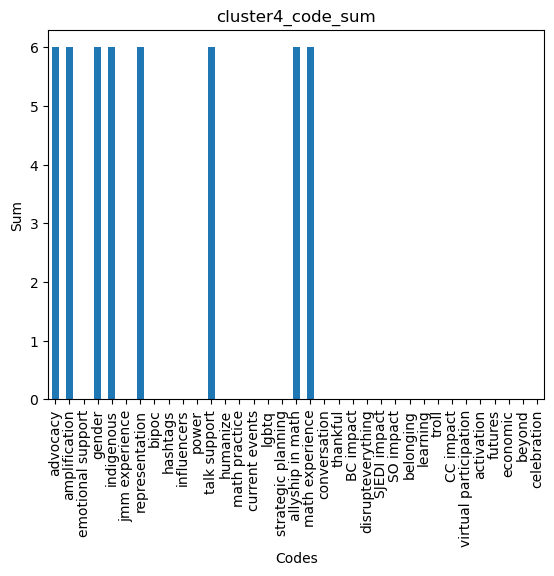

In [50]:
#cluster 3
cluster3 = node_elts[3]
df_cluster3 = df_codes_clusters.iloc[cluster3]
cluster3_code_sum = df_cluster3.iloc[:,1:-5].sum()
cluster3_code_sum.plot(kind='bar')
plt.xlabel('Codes')
plt.ylabel('Sum')
plt.title('cluster3_code_sum')

Text(0, 0.5, 'Sum')

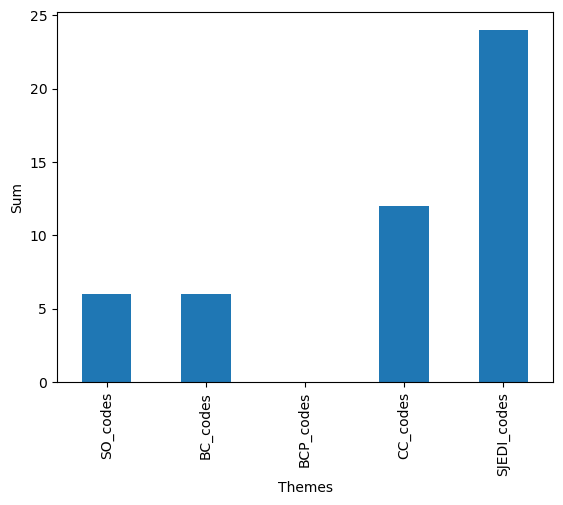

In [51]:
#themes for cluster 3
cluster3_themes = df_cluster3.iloc[:,-5:].sum()
cluster3_themes.plot(kind='bar')
plt.xlabel('Themes')
plt.ylabel('Sum')

In [52]:
df[df['user_username'].isin(df_cluster3['index'].values)]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
428,181,1218619109199486976,RyneVanK,RT @DrMRLD: I highly recommend reading this in...,2020-01-18T19:40:11.000Z,1218619109199486976,en,False,193933592,Twitter for iPhone,...,1,talk support,0,,1,math experience; allyship in math,1,gender; indigenous; advocacy; representation,,"[advocacy, allyship in math, amplification, ge..."
433,187,1218612424171032582,DeirdreM10,RT @DrMRLD: I highly recommend reading this in...,2020-01-18T19:13:37.000Z,1218612424171032582,en,False,1010184317467856896,Twitter Web App,...,1,talk support,0,,1,math experience; allyship in math,1,gender; indigenous; advocacy; representation,,"[advocacy, allyship in math, amplification, ge..."
437,191,1218611681183653891,Miles_Ott,RT @DrMRLD: I highly recommend reading this in...,2020-01-18T19:10:40.000Z,1218611681183653891,en,False,2414519376,Twitter Web App,...,1,talk support,0,,1,math experience; allyship in math,1,gender; indigenous; advocacy; representation,,"[advocacy, allyship in math, amplification, ge..."
1017,997,1219005499666026497,teehee_sarah,RT @DrMRLD: I highly recommend reading this in...,2020-01-19T21:15:33.000Z,1219005499666026497,en,False,584229709,Twitter for iPhone,...,1,talk support,0,,1,math experience; allyship in math,1,gender; indigenous; advocacy; representation,,"[advocacy, allyship in math, amplification, ge..."
1061,1053,1218763093871710208,jasonemiller,RT @DrMRLD: I highly recommend reading this in...,2020-01-19T05:12:19.000Z,1218763093871710208,en,False,11392912,Twitter Web App,...,1,talk support,0,,1,math experience; allyship in math,1,gender; indigenous; advocacy; representation,,"[advocacy, allyship in math, amplification, ge..."
1096,1094,1218665955322220544,BrandauerJ,RT @DrMRLD: I highly recommend reading this in...,2020-01-18T22:46:20.000Z,1218665955322220544,en,False,3431600254,Twitter Web App,...,1,talk support,0,,1,math experience; allyship in math,1,gender; indigenous; advocacy; representation,,"[advocacy, allyship in math, amplification, ge..."


Text(0.5, 1.0, 'cluster5_code_sum')

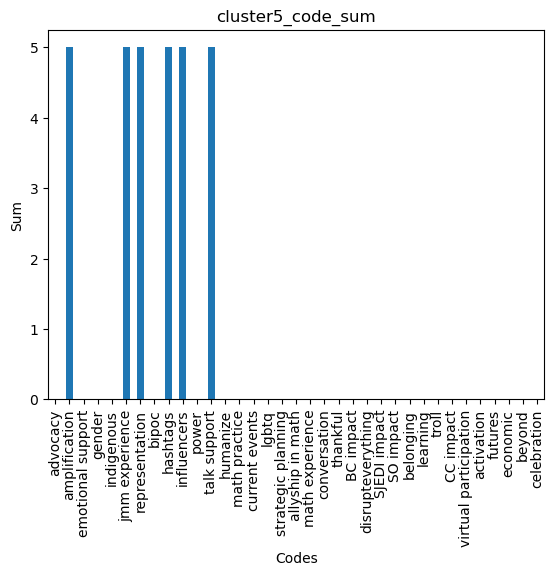

In [53]:
#cluster 4
cluster4 = node_elts[4]
df_cluster4 = df_codes_clusters.iloc[cluster4]
cluster4_code_sum = df_cluster4.iloc[:,1:-5].sum()
cluster4_code_sum.plot(kind='bar')
plt.xlabel('Codes')
plt.ylabel('Sum')
plt.title('cluster4_code_sum')


Text(0, 0.5, 'Sum')

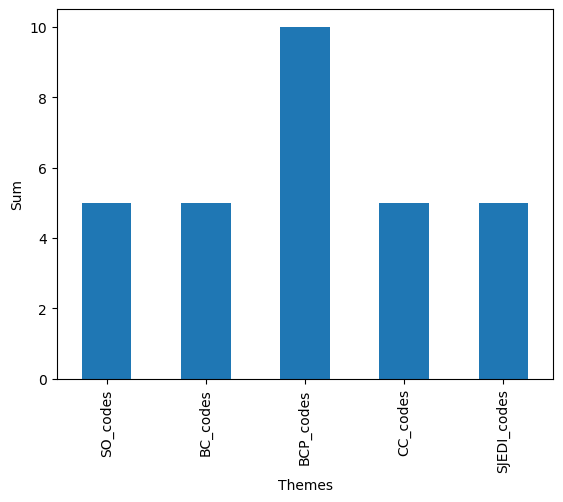

In [54]:
#themes for cluster 4
cluster4_themes = df_cluster4.iloc[:,-5:].sum()
cluster4_themes.plot(kind='bar')
plt.xlabel('Themes')
plt.ylabel('Sum')

In [55]:
df[df['user_username'].isin(df_cluster4['index'].values)]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
582,389,1218285000929370113,eterEphemeral,RT @WanderingPoint: #JMM2020 #DisruptJMM \nAdr...,2020-01-17T21:32:33.000Z,1218285000929370113,en,False,813867393512419328,Twitter Web App,...,1,talk support,1,influencers; hashtags,1,jmm experience,1,representation,,"[amplification, hashtags, influencers, jmm exp..."
666,507,1218135689935626241,ChengSoonOng,RT @WanderingPoint: #JMM2020 #DisruptJMM \nAdr...,2020-01-17T11:39:15.000Z,1218135689935626241,en,False,2164645370,erased1004033,...,1,talk support,1,influencers; hashtags,1,jmm experience,1,representation,,"[amplification, hashtags, influencers, jmm exp..."
693,565,1217973241832263681,AlexGalarce,RT @WanderingPoint: #JMM2020 #DisruptJMM \nAdr...,2020-01-17T00:53:44.000Z,1217973241832263681,en,False,2897730820,Twitter for iPhone,...,1,talk support,1,influencers; hashtags,1,jmm experience,1,representation,,"[amplification, hashtags, influencers, jmm exp..."
695,567,1217966650135171073,Category_Fury,RT @WanderingPoint: #JMM2020 #DisruptJMM \nAdr...,2020-01-17T00:27:32.000Z,1217966650135171073,en,False,861976616678772736,Twitter for iPhone,...,1,talk support,1,influencers; hashtags,1,jmm experience,1,representation,,"[amplification, hashtags, influencers, jmm exp..."
722,599,1217920602717204489,KristinLauter,RT @WanderingPoint: #JMM2020 #DisruptJMM \nAdr...,2020-01-16T21:24:34.000Z,1217920602717204489,en,False,2896124082,Twitter for iPhone,...,1,talk support,1,influencers; hashtags,1,jmm experience,1,representation,,"[amplification, hashtags, influencers, jmm exp..."


Text(0.5, 1.0, 'cluster6_code_sum')

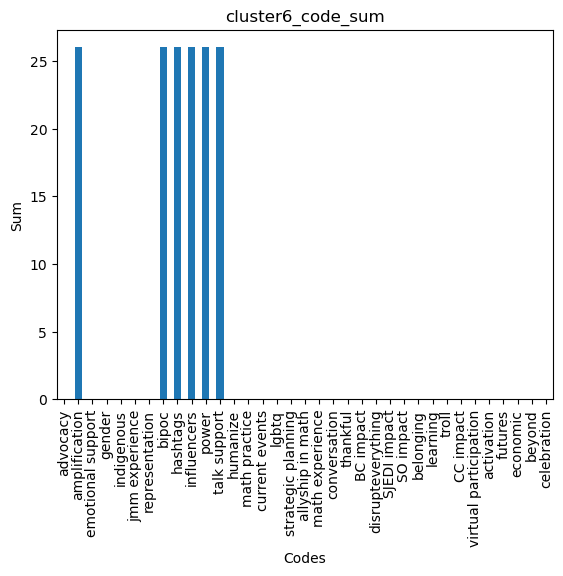

In [56]:
#cluster 5
cluster5 = node_elts[5]
df_cluster5 = df_codes_clusters.iloc[cluster5]
cluster5_code_sum = df_cluster5.iloc[:,1:-5].sum()
cluster5_code_sum.plot(kind='bar')
plt.xlabel('Codes')
plt.ylabel('Sum')
plt.title('cluster6_code_sum')


Text(0, 0.5, 'Sum')

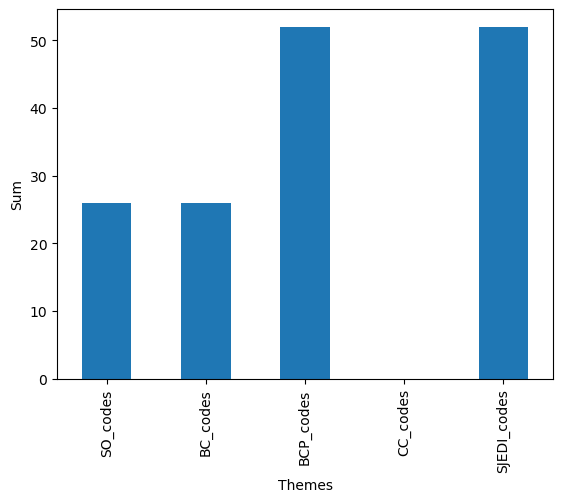

In [57]:
#themes for cluster 5
cluster5_themes = df_cluster5.iloc[:,-5:].sum()
cluster5_themes.plot(kind='bar')
plt.xlabel('Themes')
plt.ylabel('Sum')


In [58]:
df[df['user_username'].isin(df_cluster5['index'].values)]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
780,689,1347565115680452608,kellyyyruth,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-08T15:25:34.000Z,1347565115680452608,en,False,419057436,Twitter for iPhone,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."
811,728,1347270542764683270,BmcChem,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-07T19:55:03.000Z,1347270542764683270,en,False,1288238333559222277,Twitter for iPhone,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."
827,749,1347183486403108865,EllisMathEd,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-07T14:09:07.000Z,1347183486403108865,en,False,821580276,Twitter for Android,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."
829,751,1347166671862165505,redneurons,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-07T13:02:18.000Z,1347166671862165505,en,False,1556630828,Twitter Web App,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."
830,752,1347165359707738113,bearboyf,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-07T12:57:05.000Z,1347165359707738113,en,False,1324157130253938691,Twitter for iPhone,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."
833,756,1347043884044591111,kim_yoak,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-07T04:54:23.000Z,1347043884044591111,en,False,3923302577,Twitter for iPad,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."
837,762,1346948589281374208,GaryAdolphson,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-06T22:35:43.000Z,1346948589281374208,en,False,1123390365103296514,Twitter Web App,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."
840,766,1346900009321693187,abbaskins,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-06T19:22:41.000Z,1346900009321693187,en,False,830101596197502978,Twitter for iPhone,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."
845,771,1346888574273130496,41mikes,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-06T18:37:14.000Z,1346888574273130496,en,False,1081887739,TweetDeck,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."
848,774,1346880769755672581,victorerikray,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-06T18:06:14.000Z,1346880769755672581,en,False,2336915086,Twitter for iPad,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."


Text(0.5, 1.0, 'cluster7_code_sum')

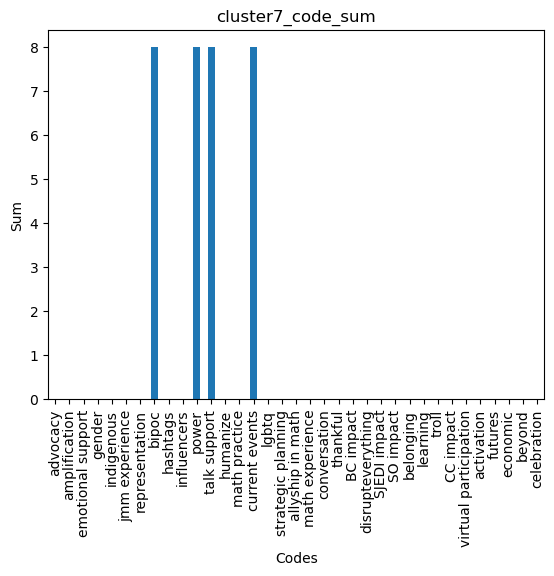

In [59]:
#cluster 6
cluster6 = node_elts[6]
df_cluster6 = df_codes_clusters.iloc[cluster6]
cluster6_code_sum = df_cluster6.iloc[:,1:-5].sum()
cluster6_code_sum.plot(kind='bar')
plt.xlabel('Codes')
plt.ylabel('Sum')
plt.title('cluster7_code_sum')

Text(0, 0.5, 'Sum')

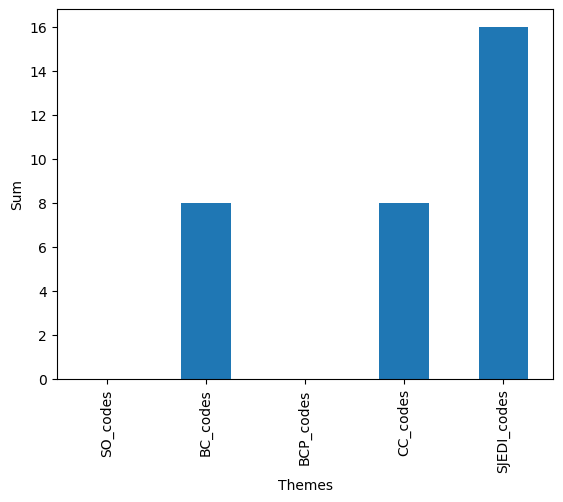

In [60]:
#themes for cluster 6
cluster6_themes = df_cluster6.iloc[:,-5:].sum()
cluster6_themes.plot(kind='bar')
plt.xlabel('Themes')
plt.ylabel('Sum')


In [61]:
df[df['user_username'].isin(df_cluster6['index'].values)]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
785,696,1347443798163525635,declan_hoare,RT @MarissaKawehi: Just asking a fundamental m...,2021-01-08T07:23:30.000Z,1347443798163525635,en,False,2893219468,Twitter for iPhone,...,1,talk support,0,,1,current events,1,bipoc; power,,"[bipoc, current events, power, talk support]"
786,697,1347431517988016128,WolverKeith,RT @MarissaKawehi: Just asking a fundamental m...,2021-01-08T06:34:42.000Z,1347431517988016128,en,False,178213281,Twitter for Android,...,1,talk support,0,,1,current events,1,bipoc; power,,"[bipoc, current events, power, talk support]"
791,702,1347396810189524995,libbyk_,RT @MarissaKawehi: Just asking a fundamental m...,2021-01-08T04:16:47.000Z,1347396810189524995,en,False,925904609511690240,Twitter for iPhone,...,1,talk support,0,,1,current events,1,bipoc; power,,"[bipoc, current events, power, talk support]"
797,711,1347310788889997313,SineOutlook,RT @MarissaKawehi: Just asking a fundamental m...,2021-01-07T22:34:58.000Z,1347310788889997313,en,False,856307421979054080,Twitter for Android,...,1,talk support,0,,1,current events,1,bipoc; power,,"[bipoc, current events, power, talk support]"
798,712,1347310540633354245,rdomagalski,RT @MarissaKawehi: Just asking a fundamental m...,2021-01-07T22:33:59.000Z,1347310540633354245,en,False,1591794578,Twitter for Android,...,1,talk support,0,,1,current events,1,bipoc; power,,"[bipoc, current events, power, talk support]"
800,714,1347305958163230720,quaternion_j,RT @MarissaKawehi: Just asking a fundamental m...,2021-01-07T22:15:46.000Z,1347305958163230720,en,False,850439936,Twitter for Android,...,1,talk support,0,,1,current events,1,bipoc; power,,"[bipoc, current events, power, talk support]"
801,715,1347305859626500096,EmilyTWinn13,RT @MarissaKawehi: Just asking a fundamental m...,2021-01-07T22:15:23.000Z,1347305859626500096,en,False,1080492667895717888,Twitter for Android,...,1,talk support,0,,1,current events,1,bipoc; power,,"[bipoc, current events, power, talk support]"
803,717,1347305022456016896,notnotneil,RT @MarissaKawehi: Just asking a fundamental m...,2021-01-07T22:12:03.000Z,1347305022456016896,en,False,789651991291133953,Twitter for Android,...,1,talk support,0,,1,current events,1,bipoc; power,,"[bipoc, current events, power, talk support]"


Text(0.5, 1.0, 'cluster7_code_sum')

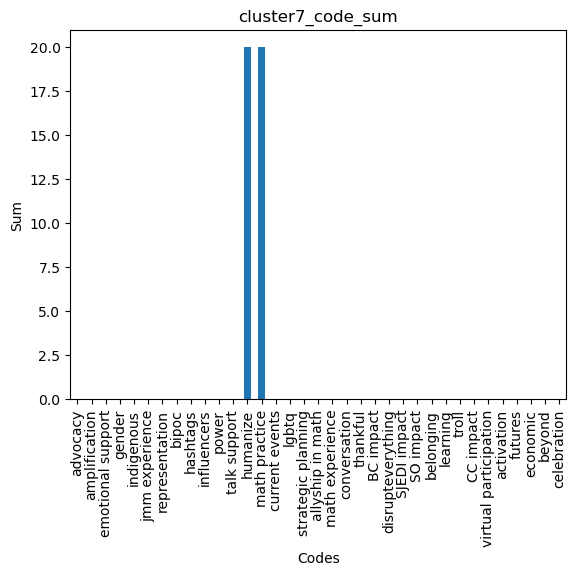

In [69]:
#cluster 7
cluster7 = node_elts[7]
df_cluster7 = df_codes_clusters.iloc[cluster7]
cluster7_code_sum = df_cluster7.iloc[:,1:-5].sum()
cluster7_code_sum.plot(kind='bar')
plt.xlabel('Codes')
plt.ylabel('Sum')
plt.title('cluster7_code_sum')

Text(0, 0.5, 'Sum')

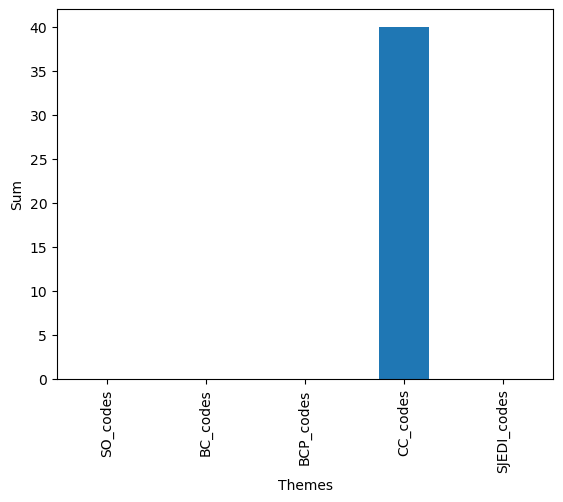

In [70]:
#themes for cluster 7
cluster7_themes = df_cluster7.iloc[:,-5:].sum()
cluster7_themes.plot(kind='bar')
plt.xlabel('Themes')
plt.ylabel('Sum')

In [71]:
#show df for index in cluster 7
df[df['user_username'].isin(df_cluster7['index'].values)]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
940,906,1220679611664797698,matienda,RT @RG1gal: On the heels of #disruptJMM you mi...,2020-01-24T12:07:53.000Z,1220679611664797698,en,False,173831345,Twitter for iPhone,...,0,,0,,1,humanize; math practice,0,,,"[humanize, math practice]"
942,910,1220241570454216704,1Biotensegrity,RT @RG1gal: On the heels of #disruptJMM you mi...,2020-01-23T07:07:16.000Z,1220241570454216704,en,False,2992072018,Twitter for iPhone,...,0,,0,,1,humanize; math practice,0,,,"[humanize, math practice]"
948,916,1220030751347040259,DrErikaBullock,RT @RG1gal: On the heels of #disruptJMM you mi...,2020-01-22T17:09:32.000Z,1220030751347040259,en,False,17949510,Twitter for iPhone,...,0,,0,,1,humanize; math practice,0,,,"[humanize, math practice]"
949,917,1220029775273775104,PoonehSabouri,RT @RG1gal: On the heels of #disruptJMM you mi...,2020-01-22T17:05:40.000Z,1220029775273775104,en,False,1061256476088516609,Twitter for iPad,...,0,,0,,1,humanize; math practice,0,,,"[humanize, math practice]"
950,918,1220028947968118784,karikokka,RT @RG1gal: On the heels of #disruptJMM you mi...,2020-01-22T17:02:22.000Z,1220028947968118784,en,False,471751474,Twitter for iPhone,...,0,,0,,1,humanize; math practice,0,,,"[humanize, math practice]"
951,920,1219913049290805249,MsFnstlua,RT @RG1gal: On the heels of #disruptJMM you mi...,2020-01-22T09:21:50.000Z,1219913049290805249,en,False,1122541518085132289,Twitter Web App,...,0,,0,,1,humanize; math practice,0,,,"[humanize, math practice]"
956,926,1219753491054432262,JookieTookie,RT @RG1gal: On the heels of #disruptJMM you mi...,2020-01-21T22:47:48.000Z,1219753491054432262,en,False,1482578652,Twitter for Android,...,0,,0,,1,humanize; math practice,0,,,"[humanize, math practice]"
957,927,1219744956211793920,robinelgenubi,RT @RG1gal: On the heels of #disruptJMM you mi...,2020-01-21T22:13:53.000Z,1219744956211793920,en,False,907831462820540417,Twitter for Android,...,0,,0,,1,humanize; math practice,0,,,"[humanize, math practice]"
961,932,1219668303154745344,NepantlaTC,RT @RG1gal: On the heels of #disruptJMM you mi...,2020-01-21T17:09:18.000Z,1219668303154745344,en,False,1154081200480428032,Twitter Web App,...,0,,0,,1,humanize; math practice,0,,,"[humanize, math practice]"
962,933,1219662361524461569,geonz,RT @RG1gal: On the heels of #disruptJMM you mi...,2020-01-21T16:45:41.000Z,1219662361524461569,en,False,13051382,Twitter Web App,...,0,,0,,1,humanize; math practice,0,,,"[humanize, math practice]"
